###Hacemos una primera vista del comportamiento de los datos y las características que los definen

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset1.csv", header=0)
del df['Unnamed: 0']
df.describe()

,cero,uno
count,500.000000,500.000000
mean,0.003601,0.035063
std,0.967035,0.991967
min,-3.241267,-2.423879
25%,-0.629572,-0.659287
50%,0.018426,0.028321
75%,0.609464,0.702322
max,3.078881,3.852731


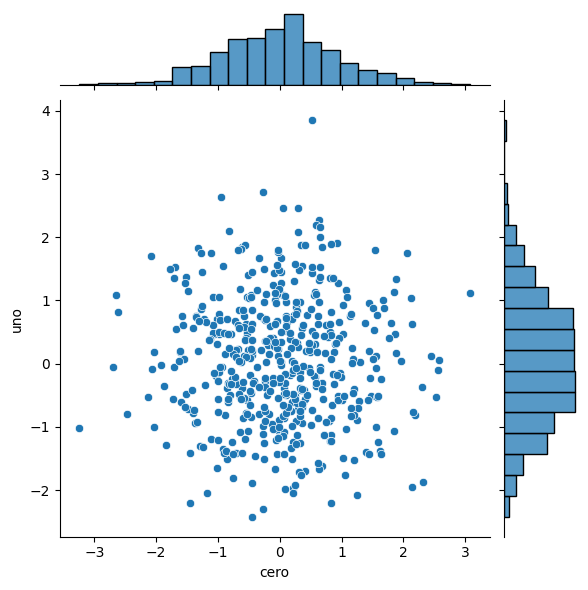

In [2]:
sns.jointplot(x="cero", y="uno", data=df)

###Realizamos una prueba de normalidad con la prueba de Shapiro-Wilk y un diagrama q-q para poder visualizar de mejor manera

Prueba de shapiro:  0.9971420764923096


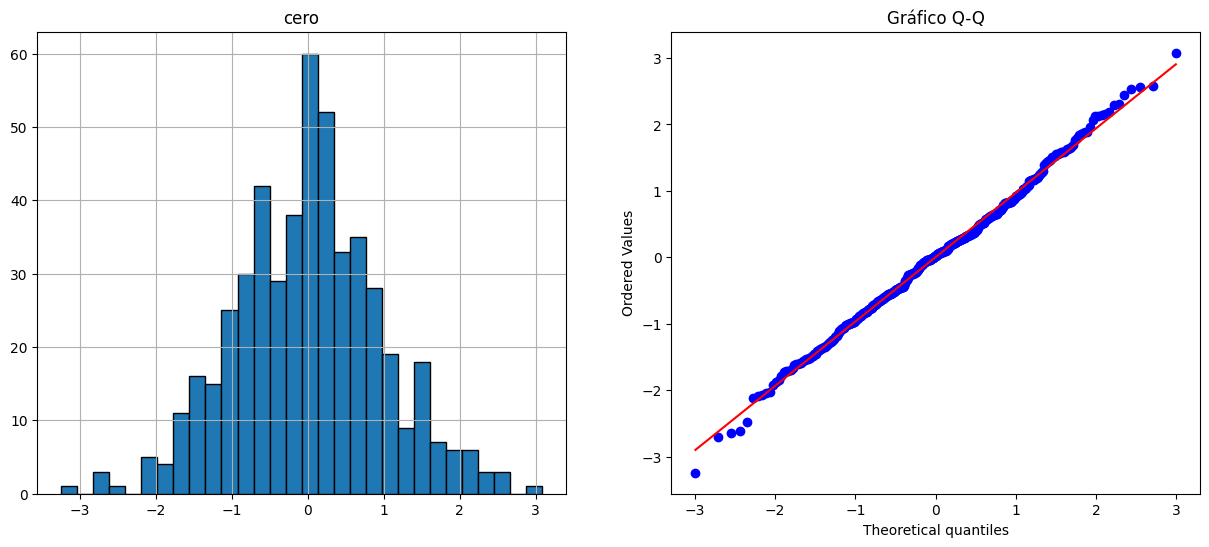

In [3]:
from scipy import stats

#otra prueba de normalidad
def diagmostic_grafic(df, variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.title(variable)
  df[variable].hist(bins=30, edgecolor='black')
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm', plot=plt)
  plt.title('Gráfico Q-Q')
  plt.show()

res = stats.shapiro(df['cero'])
print("Prueba de shapiro: ",res.statistic)
diagmostic_grafic(df, 'cero')

Prueba de shapiro:  0.9958485960960388


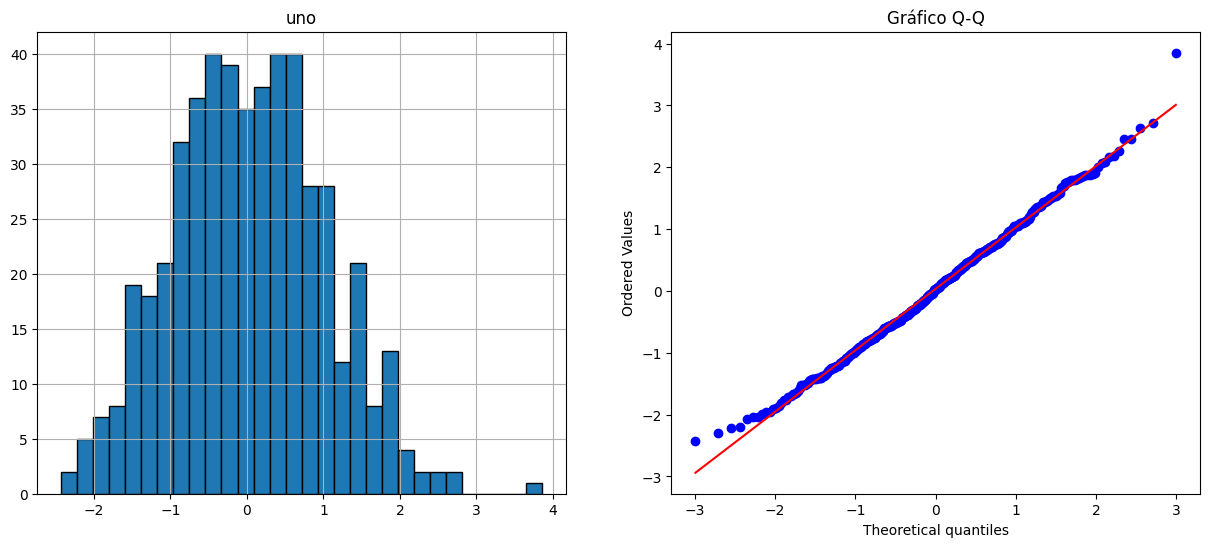

In [4]:
res = stats.shapiro(df['uno'])
print("Prueba de shapiro: ",res.statistic)
diagmostic_grafic(df, 'uno')

En la gráfica de la columna '1', parece ser que existe un outlier, para tratarlo, usaremos percentiles

In [5]:
uv = np.percentile(df['uno'],[99])[0]
#Los valores que son superiores a uv deben de ser outliers y con la siguiente función se identifican
print(uv)
df[(df['uno'] > uv)]

2.2725389306254593


,cero,uno
43,0.289169,2.455300
74,0.060230,2.463242
263,-0.264657,2.720169
312,-0.949399,2.632382
399,0.515048,3.852731


In [ ]:
#Se modifican los outliers para que su influencia sea menor
df[(df['uno'] > uv)] = uv

### Hasta aquí podemos dectectar que no hay datos faltantes, ni variables categóricas que tratar, además al graficar todas las instancias de ambas columnas, parece ser que se sigue una distribución normal.

Verificaremos si existe correlación o no entre las variables

<Axes: >

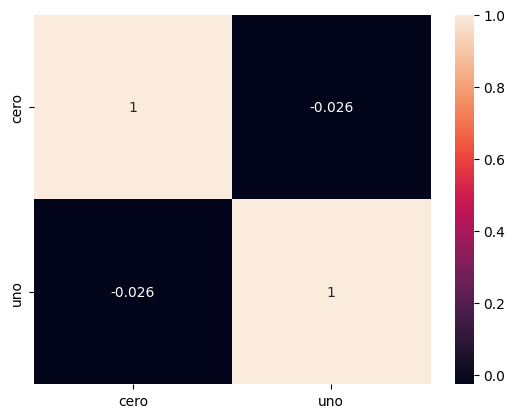

In [6]:
cols = ["cero", "uno"]
sns.heatmap(
    data=df[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

####Información hasta el momento

Con las pruebas de normalidad, nos damos cuenta que ambas columnas siguen una distribución normal, y con el cálculo de la correlación podemos observar que existe una relación muy baja entre ambas variables.

###Regresión lineal (Least Squares)


Intercepto: 0.0288, coeficiente: 0.027
Los resultados: 
El R^2 en training es:0.0005845161147485234 y en test es:0.0009727983487339831
El MSE en training es:1.0019636671079264 y en test es:0.933240525821462
El MAE en training es:0.8002484753547776 y en test es:0.8130787549463755


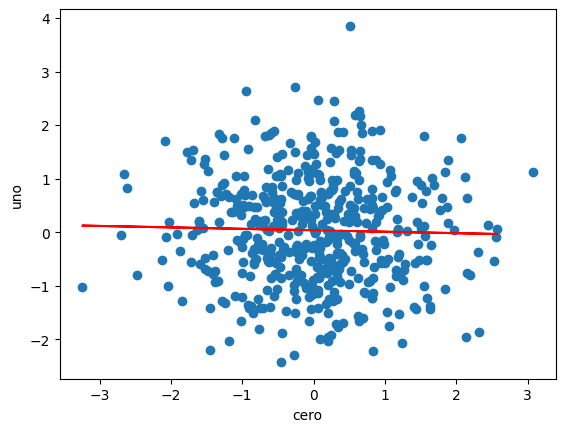

In [7]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x_train_ls, x_test_ls, y_train_ls, y_test_ls = train_test_split(df[['cero']],df['uno'], test_size=0.3, random_state=0)

lm = smf.ols(formula = 'uno ~ cero', data = df).fit()
#lm.summary()
print(f"\nIntercepto: 0.0288, coeficiente: 0.027") #datos extraidos del summary


#Visualizando el modelo creado
plt.scatter(df['cero'], df['uno'])
plt.plot(x_train_ls, lm.predict(x_train_ls), color='red')
plt.xlabel("cero")
plt.ylabel("uno")

# Calcular las métricas de precisión
y_train_a_ls = lm.predict(x_train_ls)
y_test_a_ls = lm.predict(x_test_ls)

rtrain_ls = r2_score(y_train_ls,y_train_a_ls)
rtest_ls  = r2_score(y_test_ls,y_test_a_ls)

mse_train_ls = mean_squared_error(y_train_ls, y_train_a_ls)
mse_test_ls = mean_squared_error(y_test_ls, y_test_a_ls)

mae_train_ls = mean_absolute_error(y_train_ls, y_train_a_ls)
mae_test_ls = mean_absolute_error(y_test_ls, y_test_a_ls)

# Mostrar los resultados
print("Los resultados: ")
print(f"El R^2 en training es:{rtrain_ls} y en test es:{rtest_ls}")
print(f"El MSE en training es:{mse_train_ls} y en test es:{mse_test_ls}")
print(f"El MAE en training es:{mae_train_ls} y en test es:{mae_test_ls}")

###Regresión Lineal (Sklearn)

Los resultados para regresión lineal: 
Intercepto: 0.03498487021150145, coeficiente: [-0.02425014]
El R^2 en training es:0.0005865737230589252 y en test es:0.0009601218610678641
El MSE en training es:1.0019616042533865 y en test es:0.933252367553094
El MAE en training es:0.8002385221556675 y en test es:0.8130438750898854


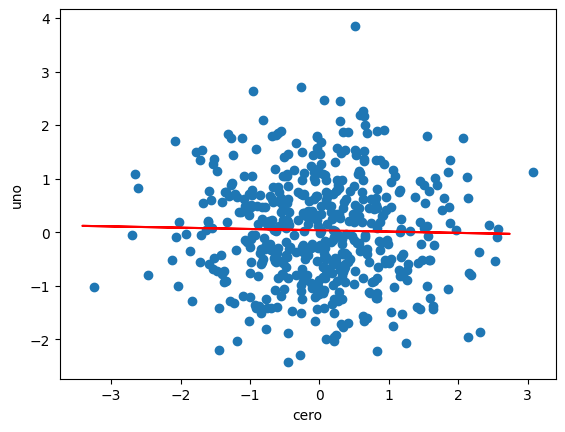

In [9]:
# Ahora con sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(df[['cero']],df['uno'], test_size=0.3, random_state=0)

#Rescalamos los datos antes de entrenar al modelo
sc = StandardScaler()
x_train = sc.fit_transform(x_train) #escalamos el set de entrenamiento
x_test = sc.transform(x_test) #escalamos el set de prueba

lm2 = LinearRegression()
lm2.fit(x_train,y_train)

#con el modelo creado, podemos predecir los valores en y
y_train_a = lm2.predict(x_train)
y_test_a = lm2.predict(x_test)

#Visualizando el modelo creado
plt.scatter(df['cero'], df['uno'])

# Graficamos la linea de regresion ajustada
plt.plot(x_train, lm2.predict(x_train), color='red')
plt.xlabel("cero")
plt.ylabel("uno")

# Calcular las métricas de precisión
rtrain = r2_score(y_train,y_train_a)
rtest  = r2_score(y_test,y_test_a)

mse_train = mean_squared_error(y_train, y_train_a)
mse_test = mean_squared_error(y_test, y_test_a)

mae_train = mean_absolute_error(y_train, y_train_a)
mae_test = mean_absolute_error(y_test, y_test_a)

# Mostrar los resultados
print(f"Los resultados para regresión lineal: ")
print(f"Intercepto: {lm2.intercept_}, coeficiente: {lm2.coef_}")
print(f"El R^2 en training es:{rtrain} y en test es:{rtest}")
print(f"El MSE en training es:{mse_train} y en test es:{mse_test}")
print(f"El MAE en training es:{mae_train} y en test es:{mae_test}")

Todo indica que incluso el modelo generado por sklearn no nos es muy útil, por lo que usaremos la técnica K-NN para intentar predecir un valor en Y con los datos otorgados en X


####Intervalo de confianza

Para el intervalo de confianza de este modelo de regresión lineal, utilizaré la raíz cuadrática media del error (RSME), considerada la mejor métrica para medir el error en predicciones númericas.

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

error = sqrt(mean_squared_error(y_test, y_test_a))
error

0.966049878398157

Nuestro intervalo de confianza:

    (y ± 0.9641)
  Donde y es el valor que predice el modelo

###Regresión lineal (K-NN)

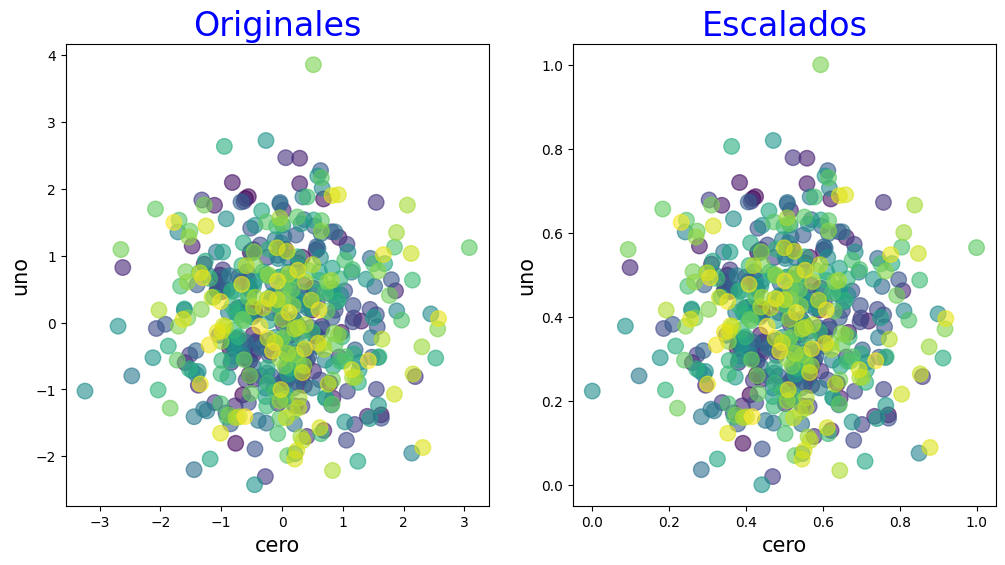

In [11]:
from sklearn import preprocessing #para re-escalar los datos
#Graficar datos crudos
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1,2,1)
ax.scatter(df['cero'], df['uno'], marker=".",
           s=500, c=range(df['cero'].size), alpha=0.6)

ax.set_title("Originales", size=24, color="blue")
ax.set_ylabel("uno", size=15)
ax.set_xlabel("cero", size=15)
ax.ticklabel_format(style="plain")

#Escalamiento de los datos
escala_x = preprocessing.MinMaxScaler()
escala_y = preprocessing.MinMaxScaler()
x_knn = escala_x.fit_transform(df['cero'].values.reshape(-1,1))
y_knn = escala_y.fit_transform(df['uno'].values.reshape(-1,1))

#Graficar datos escalados
ax = fig.add_subplot(1,2,2)
ax.scatter(x_knn, y_knn, marker=".",
           s=500, c=range(x_knn.size), alpha=0.6)

ax.set_title("Escalados", size=24, color="blue")
ax.set_ylabel("uno", size=15)
ax.set_xlabel("cero", size=15)
ax.ticklabel_format(style="plain")

plt.show()

####Buscaremos la k con menor error

Text(0, 0.5, 'Tasa de error')

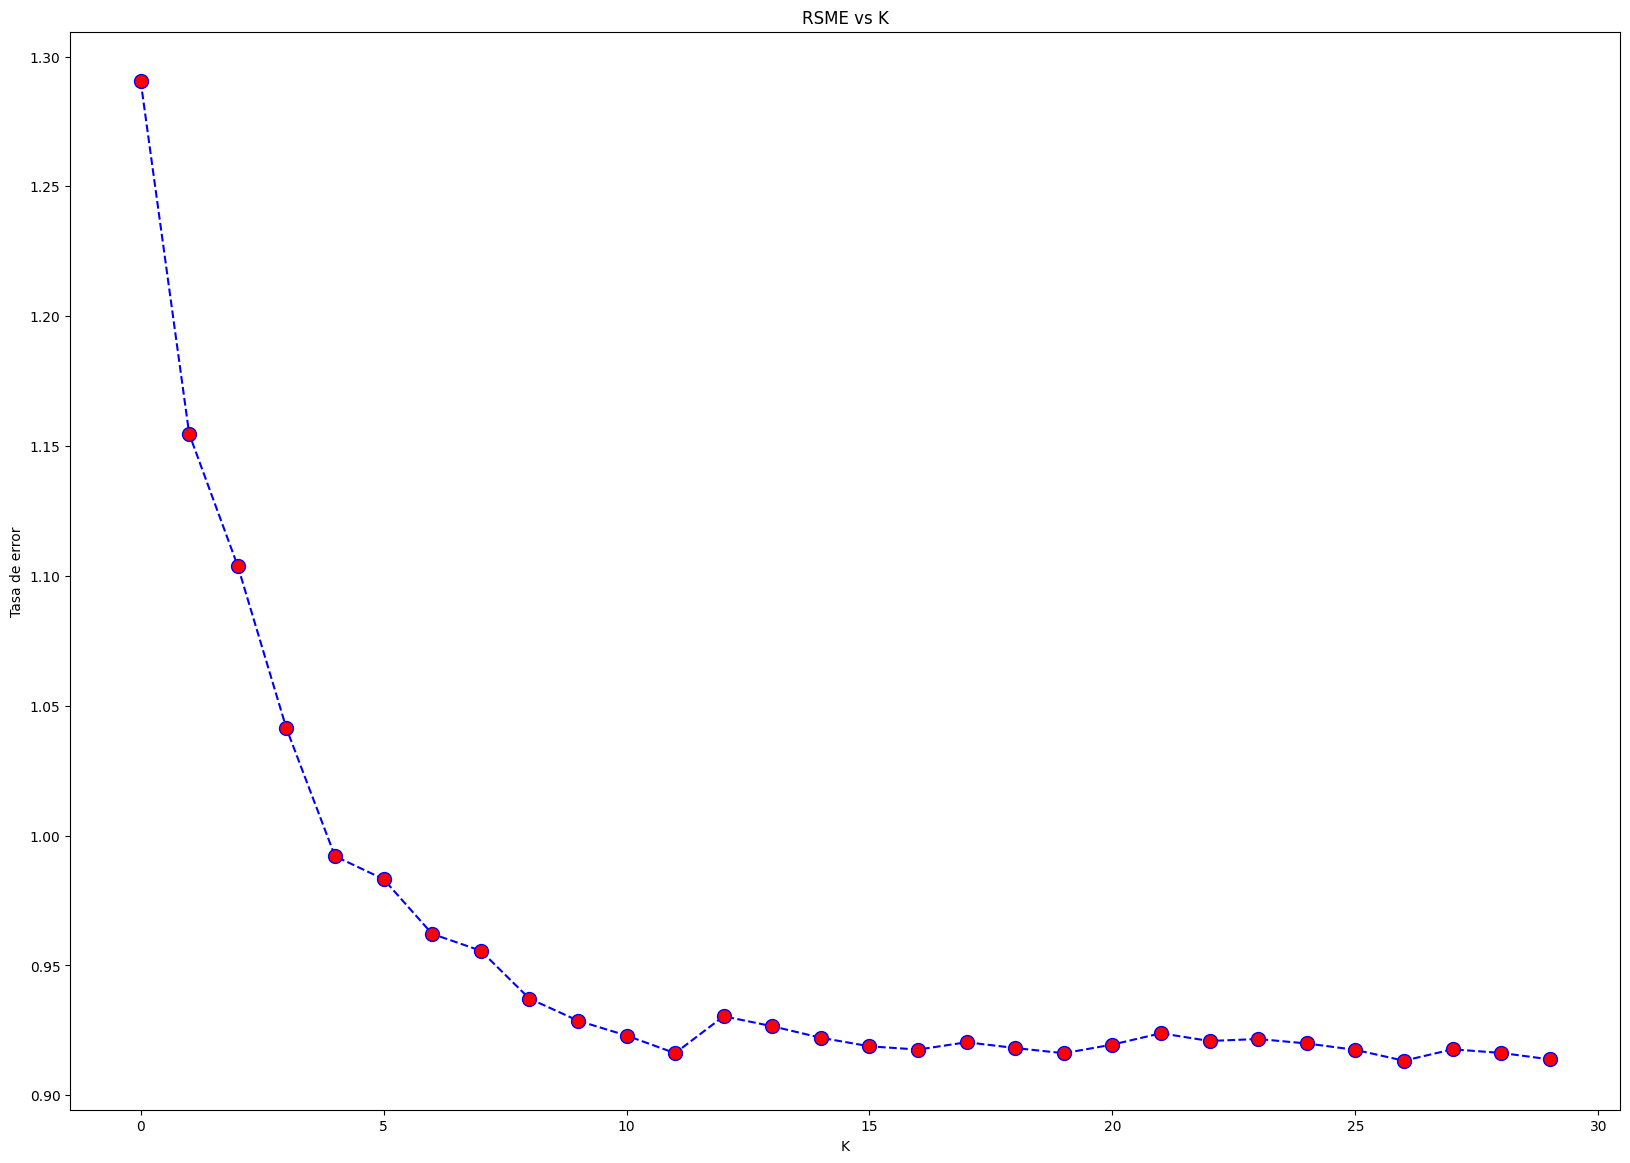

In [12]:
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(df[['cero']],df['uno'], test_size=0.2, random_state=0)

# Escalamos los datos
sc = StandardScaler()
x_train_knn = sc.fit_transform(x_train_knn) #escalamos el set de entrenamiento
x_test_knn = sc.transform(x_test_knn) #escalamos el set de prueba

from sklearn import neighbors

rmse_val = [] #almacenaremos los diferentes valores de k

for K in range(30):
  K += 1
  model = neighbors.KNeighborsRegressor(n_neighbors=K)
  model.fit(x_train_knn, y_train_knn)
  pred = model.predict(x_test_knn)
  error = sqrt(mean_squared_error(y_test_knn, pred))
  rmse_val.append(error)

#graficaremos el arreglo para encontrar el error minimo y la k optima
plt.figure(figsize=(20,14))
plt.plot(rmse_val, color = "blue", linestyle="dashed", marker="o",
         markerfacecolor = "red", markersize=10)
plt.title("RSME vs K")
plt.xlabel("K")
plt.ylabel("Tasa de error")

####Ahora que tenemos k optima = 30 evaluaremos el modelo

Los resultados para KNN: 
El R^2 en training es:0.03990305104336722 y en test es:0.023887608707751862
El MSE en training es:0.9723015582905066 y en test es:0.8351163307869192
El MAE en training es:0.7943284174390086 y en test es:0.7807074498831139


Text(0, 0.5, 'uno')

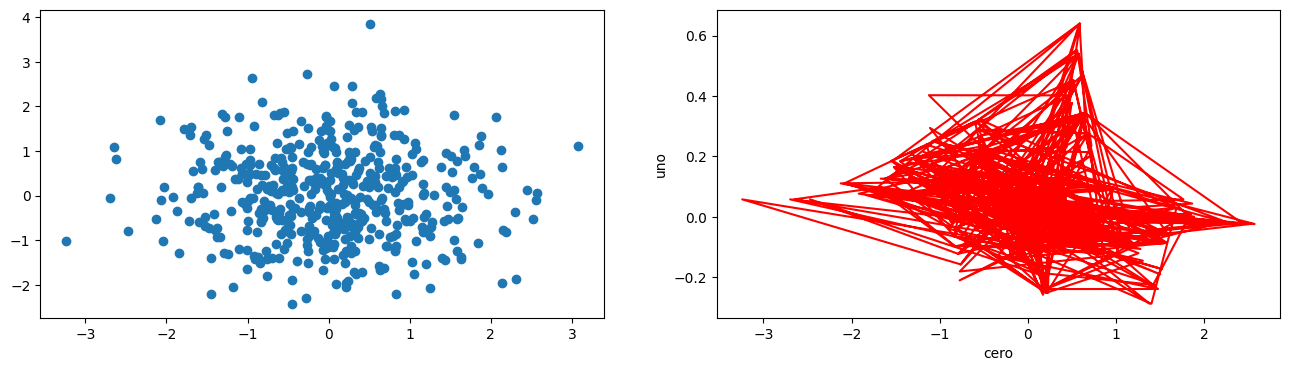

In [14]:
#Para crear el modelo K-NN
from sklearn.neighbors import KNeighborsRegressor
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(df[['cero']],df['uno'], test_size=0.2, random_state=0)

knn_ev = KNeighborsRegressor(n_neighbors=30)
regressor = knn_ev.fit(x_train_knn, y_train_knn)

#La predicción del modelo construido
y_predict_train_knn = regressor.predict(x_train_knn)
y_predict_test_knn = regressor.predict(x_test_knn)

# Calcular las métricas de precisión
rtrain_knn = r2_score(y_train_knn,y_predict_train_knn)
rtest_knn  = r2_score(y_test_knn,y_predict_test_knn)

mse_train_knn = mean_squared_error(y_train_knn, y_predict_train_knn)
mse_test_knn = mean_squared_error(y_test_knn, y_predict_test_knn)

mae_train_knn = mean_absolute_error(y_train_knn, y_predict_train_knn)
mae_test_knn = mean_absolute_error(y_test_knn, y_predict_test_knn)

# Mostrar los resultados
print("Los resultados para KNN: ")
print(f"El R^2 en training es:{rtrain_knn} y en test es:{rtest_knn}")
print(f"El MSE en training es:{mse_train_knn} y en test es:{mse_test_knn}")
print(f"El MAE en training es:{mae_train_knn} y en test es:{mae_test_knn}")

# Graficamos la linea de regresion
fig = plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.scatter(df['cero'], df['uno'])
plt.subplot(1,2,2)
plt.plot(x_train_knn, y_predict_train_knn, color='red')
plt.xlabel("cero")
plt.ylabel("uno")

###Conclusiones

El modelo generado por K-NN tuvo un mayor desempeño que las 2 regresiones lineales realizadas anteriormente, esto es debido a la distribución que tienen los datos, a simple vista podemos notar que no tienen ningún parecido con una línea recta, o una relación lo suficientemente fuerte entre las variables para definir un cambio constante, sin mencionar que en el modelo K-NN se buscó la K con el menor error posible.